# Klaszterezzünk a K-közép algoritmussal

## Ismerjük meg a súlypontalapú algoritmusokat

In [1]:
import numpy as np
A = np.array([165, 55, 70])
B = np.array([185, 60, 30])

D = (A - B)
D = D**2
D = np.sqrt(np.sum(D))

print(D)

45.0


## Készítsünk egy példát képadatokkal

In [2]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

számjegyek = load_digits()
normalizáló = StandardScaler()
X = normalizáló.fit_transform(számjegyek.data)
alapigazság = számjegyek.target

In [3]:
from sklearn.cluster import KMeans
klaszterezés = KMeans(n_clusters=10,
                    n_init=10, random_state=1)
klaszterezés.fit(X)

KMeans(n_clusters=10, n_init=10, random_state=1)

## Keressünk optimális megoldásokat

In [4]:
import numpy as np
import pandas as pd
ms = np.column_stack((alapigazság,klaszterezés.labels_))
ak = pd.DataFrame(ms,
                  columns = ['Alapigazság','Klaszterek'])
pd.crosstab(ak['Alapigazság'], ak['Klaszterek'],
            margins=True)

Klaszterek,0,1,2,3,4,5,6,7,8,9,All
Alapigazság,,,,,,,,,,,
0,1,0,0,0,0,0,0,0,176,1,178
1,0,59,0,27,0,1,0,95,0,0,182
2,0,5,100,46,4,1,0,21,0,0,177
3,0,0,13,1,154,1,0,14,0,0,183
4,158,6,0,0,0,2,8,7,0,0,181
5,1,0,16,0,30,131,0,2,0,2,182
6,0,1,0,0,0,0,0,1,1,178,181
7,1,2,6,0,0,1,18,151,0,0,179
8,0,14,7,0,55,6,0,88,0,4,174


In [5]:
import numpy as np
tehetetlenség = list()
for k in range(1,21):
    klaszterezés = KMeans(n_clusters=k,
                        n_init=10, random_state=1)
    klaszterezés.fit(X)
    tehetetlenség.append(klaszterezés.inertia_)
tehetetlenség_változás = np.diff(tehetetlenség) * -1

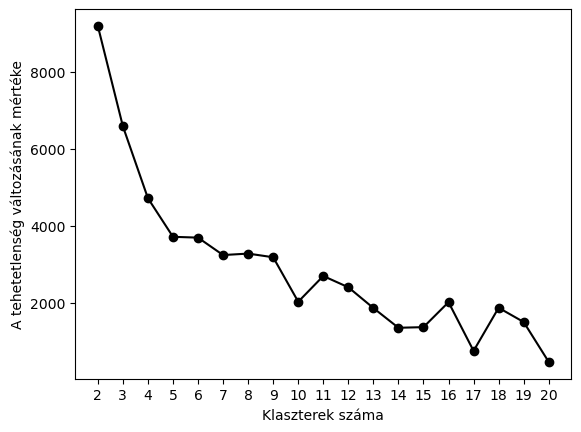

In [6]:
%matplotlib inline
import matplotlib.pyplot as dg

dg.figure()
x_tartomány = [k for k in range(2, 21)]
dg.xticks(x_tartomány)
dg.plot(x_tartomány, tehetetlenség_változás, 'ko-')
dg.xlabel('Klaszterek száma')
dg.ylabel('A tehetetlenség változásának mértéke')
dg.show()

## Klaszterezzünk big data adatokat

In [7]:
k = 10
klaszterezés = KMeans(n_clusters=k,
                    n_init=10, random_state=1)
klaszterezés.fit(X)
kközép_tehetetlenség = klaszterezés.inertia_
print(f"A K-közép tehetetlensége: {kközép_tehetetlenség:0.1f}")

A K-közép tehetetlensége: 69944.5


In [8]:
from sklearn.cluster import MiniBatchKMeans
kötegelt_klaszterezés = MiniBatchKMeans(n_clusters=k,
                                   random_state=1,
                                   n_init=3)
köteg = 100
for sor in range(0, len(X), köteg):
    if sor+köteg < len(X):
        betölt = X[sor:sor+köteg,:]
    else:
        betölt = X[sor:,:]
    kötegelt_klaszterezés.partial_fit(betölt)
kötegelt_tehetetlenség = kötegelt_klaszterezés.score(X) * -1

print(f"A MiniBatchKmeans tehetetlensége: {kötegelt_tehetetlenség:.1f}")

C:\Users\revon\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1902: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


A MiniBatchKmeans tehetetlensége: 76426.4


# Végezzünk hierarchikus klaszterezést

## Használjunk egy hierarchikus klasztermegoldást

In [9]:
from sklearn.cluster import AgglomerativeClustering

hklaszterezés = AgglomerativeClustering(
    n_clusters=10, metric='euclidean',
    linkage='ward')
hklaszterezés.fit(X)

ms = np.column_stack((alapigazság,hklaszterezés.labels_))
ak = pd.DataFrame(ms,
                  columns = ['Alapigazság','Klaszterek'])
pd.crosstab(ak['Alapigazság'],
            ak['Klaszterek'], margins=True)

Klaszterek,0,1,2,3,4,5,6,7,8,9,All
Alapigazság,,,,,,,,,,,
0,0,0,0,0,0,178,0,0,0,0,178
1,1,150,0,27,0,0,0,0,4,0,182
2,0,15,1,160,1,0,0,0,0,0,177
3,0,11,0,4,168,0,0,0,0,0,183
4,1,4,1,0,0,0,0,12,163,0,181
5,168,0,0,1,12,0,1,0,0,0,182
6,0,1,0,0,0,0,180,0,0,0,181
7,1,1,0,0,1,0,0,25,0,151,179
8,1,168,0,3,2,0,0,0,0,0,174


## Vizualizáljunk aggregáló klaszterezési megoldásokat

In [10]:
alapigazság[10:20]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

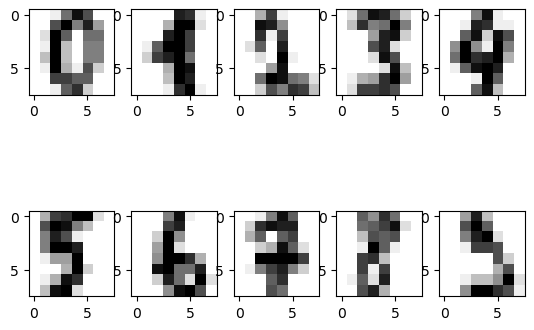

In [11]:
%matplotlib inline
import matplotlib.pyplot as dg

for k, kép in enumerate(range(10)):
    dg.subplot(2, 5, k+1)
    dg.imshow(számjegyek.images[10+kép],
               cmap='binary',
               interpolation='none')
dg.show()

In [12]:
hklaszterezés = AgglomerativeClustering(
    n_clusters=10, metric='euclidean',
    linkage='ward')
hklaszterezés.fit(X[10:20, :])

AgglomerativeClustering(metric='euclidean', n_clusters=10)

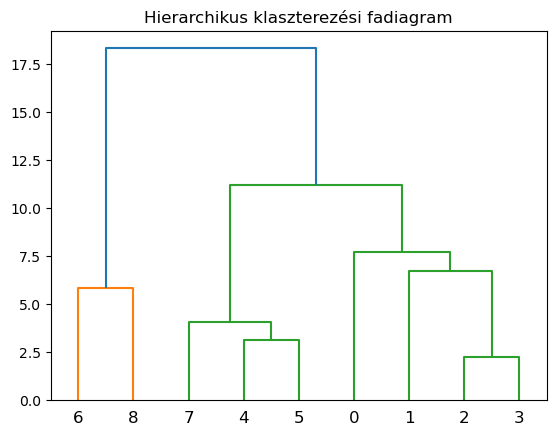

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage

kapcsolati_mátrix = linkage(hklaszterezés.children_, 'ward')
dendrogram(kapcsolati_mátrix)
dg.title('Hierarchikus klaszterezési fadiagram')
dg.show()

# Tárjunk fel új csoportokat a DBScan használatával

In [14]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=4.5, min_samples=20)
db.fit(X)

print(f"Klaszterek száma: {len(np.unique(db.labels_))}")

Klaszterek száma: 10


In [15]:
from collections import Counter
print(f"Klaszterek száma: {len(np.unique(db.labels_))}")
print(Counter(db.labels_))

ms = np.column_stack((alapigazság, db.labels_))
ak = pd.DataFrame(ms,
                  columns = ['Alapigazság', 'Klaszterek'])

pd.crosstab(ak['Alapigazság'],
            ak['Klaszterek'], margins=True)

Klaszterek száma: 10
Counter({-1: 1032, 0: 172, 1: 157, 4: 111, 3: 95, 5: 90, 7: 64, 6: 35, 2: 21, 8: 20})


Klaszterek,-1,0,1,2,3,4,5,6,7,8,All
Alapigazság,,,,,,,,,,,
0,6,172,0,0,0,0,0,0,0,0,178
1,73,0,0,20,0,89,0,0,0,0,182
2,175,0,0,0,0,2,0,0,0,0,177
3,94,0,0,0,0,0,89,0,0,0,183
4,126,0,0,0,0,0,0,35,0,20,181
5,179,0,1,0,0,0,0,0,2,0,182
6,25,0,156,0,0,0,0,0,0,0,181
7,84,0,0,0,95,0,0,0,0,0,179
8,154,0,0,0,0,20,0,0,0,0,174
